In [49]:
from importlib import reload
import numpy as np
import RTNI
import sympy
import tensornetwork as tn

import converters
import twirl
twirl = reload(twirl)

In [65]:
type(tn.Node(np.random.randn(2, 2, 2, 2))[0])

tensornetwork.network_components.Edge

## Compute $\int_{\mathbf{U}(d)}\!\mathrm{d}U\,\left(U \otimes U\right)X\left(U^{\dagger} \otimes U^{\dagger}\right)$

### Symbolic computation with RTNI

#### Define the integrand: $\left(U \otimes U\right)X\left(U^{\dagger} \otimes U^{\dagger}\right)$.

In [50]:
g = [
    [["U", 1, "in", 1], ["X", 1, "out", 1]],
    [["U", 2, "in", 1], ["X", 1, "out", 2]],
    [["X", 1, "in", 1], ["U*", 1, "out", 1]],
    [["X", 1, "in", 2], ["U*", 2, "out", 1]]
]
gw = [g, 1]
gw

[[[['U', 1, 'in', 1], ['X', 1, 'out', 1]],
  [['U', 2, 'in', 1], ['X', 1, 'out', 2]],
  [['X', 1, 'in', 1], ['U*', 1, 'out', 1]],
  [['X', 1, 'in', 2], ['U*', 2, 'out', 1]]],
 1]

#### Visualize it.

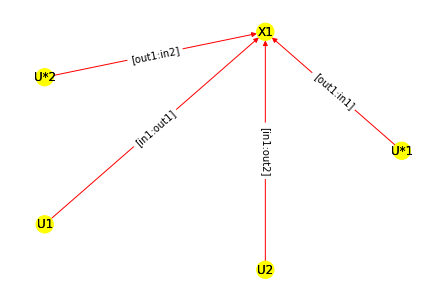

1


In [51]:
RTNI.visualizeTN([g, 1])

#### Compute the Haar average.

In [52]:
d = sympy.symbols("d")
averaged = RTNI.integrateHaarUnitary(gw, ["U", [d], [d], d])
averaged

[[[[['@U*', 1, 'in', 1], ['@U', 1, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 2, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 1]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 2]]],
  1/(d**2 - 1)],
 [[[['@U*', 1, 'in', 1], ['@U', 1, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 2, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 2]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 1]]],
  -1/(d**3 - d)],
 [[[['@U*', 1, 'in', 1], ['@U', 2, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 1, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 1]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 2]]],
  -1/(d**3 - d)],
 [[[['@U*', 1, 'in', 1], ['@U', 2, 'out', 1]],
   [['@U*', 2, 'in', 1], ['@U', 1, 'out', 1]],
   [['X', 1, 'out', 1], ['X', 1, 'in', 2]],
   [['X', 1, 'out', 2], ['X', 1, 'in', 1]]],
  1/(d**2 - 1)]]

#### Visualize the result.

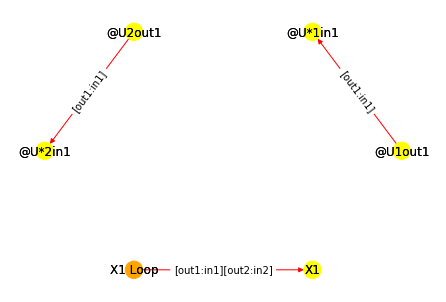

1/(d**2 - 1)


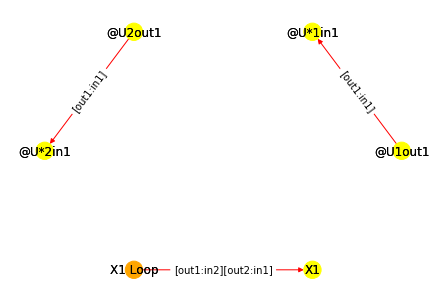

-1/(d**3 - d)


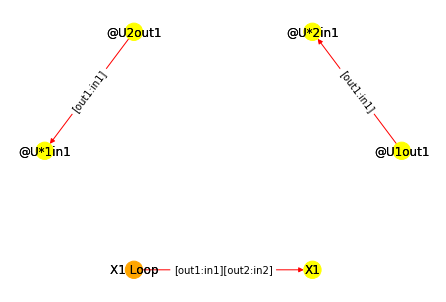

-1/(d**3 - d)


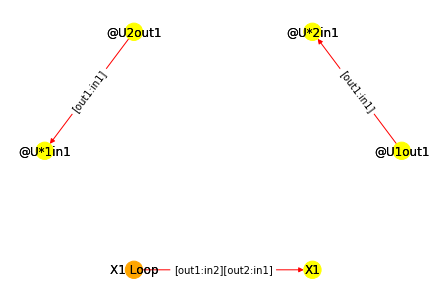

1/(d**2 - 1)


In [53]:
RTNI.visualizeTN(averaged)

### Apply symbolic computation to numerical example with `TensorNetwork`

#### Generate example.

In [54]:
d_value = 4

In [56]:
X = tn.Node(np.random.randn(*(d_value,) * 4))

#### Convert symbolic average to numerical one under `TensorNetwork` format.

In [59]:
expectation = converters.rtni_to_tn(averaged, {
    "X": X
},
d_symbol=d,
d_value=d_value,
n_tensor_factors=2)
expectation

array([[[[0.30376253, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.07674586, 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.07674586, 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.07674586],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ]]],


       [[[0.        , 0.22701667, 0.        , 

### Shortcut to direct numerical example with `TensorNetwork`

In [61]:
twirl.numerical_haar_twirl(
    tensor=X,
    d_value=d_value,
    n_tensor_factors=2
)

array([[[[0.30376253, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.07674586, 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.07674586, 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        , 0.07674586],
         [0.        , 0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        , 0.        ],
         [0.22701667, 0.        , 0.        , 0.        ]]],


       [[[0.        , 0.22701667, 0.        , 

### Compare to statistical average

In [62]:
twirl.haar_statistical_average_twirl(
    tensors=[X],
    output_edges=[X[0], X[1]],
    input_edges=[X[2], X[3]],
    d_value=d_value,
    n_tensor_factors=2,
    n_samples=10000
)

array([[[[ 2.99745423e-01-6.58122114e-03j,
          -2.78015064e-03+5.24258782e-03j,
          -2.91871063e-03-7.86441701e-03j,
          -8.31330566e-03-3.49902318e-03j],
         [ 1.10114157e-02-9.07981417e-03j,
          -2.41506581e-04-3.19396930e-03j,
           6.24157416e-03-6.78126606e-03j,
           1.72527096e-02+5.28665208e-03j],
         [ 2.83679140e-03+7.46576120e-03j,
           1.05894380e-02+2.44553942e-03j,
          -1.01426689e-03-3.78932829e-03j,
          -3.76880125e-03-5.45021753e-04j],
         [-8.23713076e-03-2.05331141e-03j,
           8.13552352e-03-1.13325688e-02j,
           7.05275659e-03+2.90628681e-03j,
          -2.63428901e-03-5.35151002e-03j]],

        [[ 7.60004518e-04-3.99882950e-03j,
           7.59854049e-02+1.02029754e-02j,
          -3.33216044e-03+2.40979293e-03j,
          -7.69688895e-03+2.91864499e-03j],
         [ 2.25184832e-01+4.36742812e-03j,
          -9.75781429e-03+2.33806465e-03j,
           8.18208998e-03+1.26278989e-02j,
    